In [32]:
from datetime import datetime, timedelta
import glob
import matplotlib.pyplot as plt
import numpy as np
import os
import geopandas as gpd
import pandas as pd
import xarray as xr
import shapely as shp
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [25]:
south_ML = gpd.read_file(r"O:\Climate-and-Energy-Policy\CERM\Projects\Wildfire\Data\ML-data-Europe-gridded\results\ignition-selection\count_fire-season-ignition-points-2008-2023thresh0.7.shp")
central_ML = gpd.read_file(r"O:\Climate-and-Energy-Policy\CERM\Projects\Wildfire\Data\ML-data-Central-Europe-gridded\results\ignition-selection\count_fire-season-ignition-points-2008-2023thresh0.7.shp")
north_ML = gpd.read_file(r"O:\Climate-and-Energy-Policy\CERM\Projects\Wildfire\Data\ML-data-Northern-Europe-gridded\results\ignition-selection\count_fire-season-ignition-points-2008-2023thresh0.7.shp")

# combine the dataframes
ML = pd.concat([south_ML, central_ML, north_ML], ignore_index=True)
ML = ML.to_crs("EPSG:4326")
ML

,id,count,geometry
0,37299,4,"POLYGON ((-9.39232 38.70163, -9.40458 38.70318..."
1,37736,1,"POLYGON ((-9.37005 39.03253, -9.2578 39.05534,..."
2,37737,1,"POLYGON ((-9.34378 38.94518, -9.23166 38.96796..."
3,37738,2,"POLYGON ((-9.3176 38.85781, -9.20562 38.88056,..."
4,37742,3,"POLYGON ((-9.10016 38.44213, -9.10999 38.44117..."
...,...,...,...
6985,119314,1,"POLYGON ((27.01891 58.23053, 26.97706 58.14359..."
6986,119325,1,"POLYGON ((26.57115 57.27341, 26.53179 57.18632..."
6987,119358,1,"POLYGON ((29.31026 62.01569, 29.25534 61.92958..."
6988,119456,1,"POLYGON ((28.14236 59.3788, 28.09582 59.29226,..."


In [26]:
south_EFFIS = gpd.read_file(r"O:\Climate-and-Energy-Policy\CERM\Projects\Wildfire\Data\ML-data-Europe-gridded\results\ignition-selection\count_recorded_fires-2008-2023.shp")
central_EFFIS = gpd.read_file(r"O:\Climate-and-Energy-Policy\CERM\Projects\Wildfire\Data\ML-data-Central-Europe-gridded\results\ignition-selection\count_recorded_fires-2008-2023.shp")
north_EFFIS = gpd.read_file(r"O:\Climate-and-Energy-Policy\CERM\Projects\Wildfire\Data\ML-data-Northern-Europe-gridded\results\ignition-selection\count_recorded_fires-2008-2023.shp")

# combine the dataframes
EFFIS = pd.concat([south_EFFIS, central_EFFIS, north_EFFIS], ignore_index=True)
EFFIS = EFFIS.to_crs("EPSG:4326")
EFFIS

,id,count,geometry
0,37298,2,"POLYGON ((-9.47366 38.73335, -9.47411 38.75076..."
1,37299,2,"POLYGON ((-9.39232 38.70163, -9.40458 38.70318..."
2,37517,1,"POLYGON ((-9.42116 38.92937, -9.34378 38.94518..."
3,37536,2,"POLYGON ((-8.91242 37.18306, -8.91028 37.18865..."
4,37537,1,"POLYGON ((-8.91779 37.14545, -8.90919 37.15556..."
...,...,...,...
5312,119187,1,"POLYGON ((30.414 64.21373, 30.35034 64.12802, ..."
5313,119395,1,"POLYGON ((30.36814 63.27906, 30.30714 63.19337..."
5314,119433,1,"POLYGON ((30.43556 63.08184, 30.37487 62.99618..."
5315,119463,1,"POLYGON ((30.62427 63.05581, 30.5631 62.97023,..."


In [27]:
south_background = gpd.read_file(r"O:\Climate-and-Energy-Policy\CERM\Projects\Wildfire\Data\ML-data-Europe-gridded\grid\europe_10km_grid.shp")
central_background = gpd.read_file(r"O:\Climate-and-Energy-Policy\CERM\Projects\Wildfire\Data\ML-data-Central-Europe-gridded\grid\europe_10km_grid.shp")
north_background = gpd.read_file(r"O:\Climate-and-Energy-Policy\CERM\Projects\Wildfire\Data\ML-data-Northern-Europe-gridded\grid\europe_10km_grid.shp")

# combine the dataframes
background = pd.concat([south_background, central_background, north_background], ignore_index=True)
background = background.to_crs("EPSG:4326")
background

,id,geometry
0,68467.0,"POLYGON ((6.48036 47.13407, 6.61196 47.13826, ..."
1,68468.0,"POLYGON ((6.61635 46.99173, 6.60177 46.99231, ..."
2,68474.0,"POLYGON ((6.53599 46.45616, 6.58616 46.45553, ..."
3,68475.0,"POLYGON ((6.52792 46.41466, 6.65774 46.41879, ..."
4,68476.0,"POLYGON ((6.53375 46.32471, 6.66335 46.32883, ..."
...,...,...
53262,119531.0,"POLYGON ((27.92216 56.07568, 27.84895 56.02429..."
53263,119532.0,"POLYGON ((28.15636 56.31963, 28.18007 56.36871..."
53264,119533.0,"POLYGON ((28.2174 56.31084, 28.22995 56.29134,..."
53265,119534.0,"POLYGON ((28.18725 56.22265, 28.15456 56.16984..."


C:\Users\jsoma\AppData\Local\Temp\ipykernel_25988\2791625480.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('YlOrRd_r')


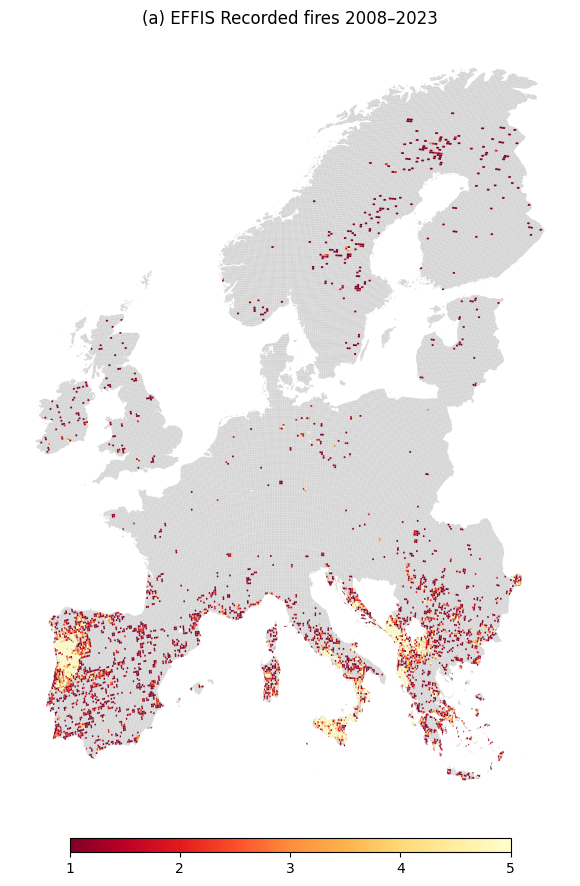

In [46]:
fig, ax = plt.subplots(figsize = (15, 10))
background.plot(color = 'lightgrey',edgecolor='None', ax = ax, zorder = 0)
# Plot EFFIS
EFFIS.plot(column='count', ax=ax, cmap='YlOrRd_r', vmin=1, vmax=5, zorder=1)

# Create mappable for custom colorbar
norm = mcolors.Normalize(vmin=1, vmax=5)
cmap = cm.get_cmap('YlOrRd_r')
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm._A = []  # Dummy array for ScalarMappable

# Add colorbar
cbar = fig.colorbar(
    sm,
    ax=ax,
    orientation='horizontal',
    pad=0.02,
    aspect=30,
    shrink=0.3,
    ticks=np.arange(1, 6, 1)
)

ax.set_title('(a) EFFIS Recorded fires 2008–2023')
ax.set_axis_off()

plt.tight_layout()
plt.show()

C:\Users\jsoma\AppData\Local\Temp\ipykernel_25988\1843226284.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('YlOrRd_r')


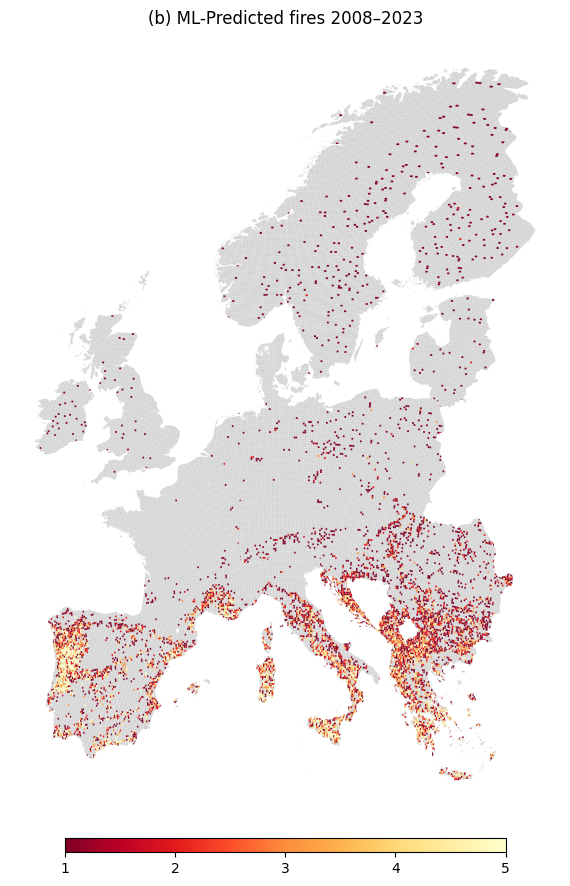

In [47]:
fig, ax = plt.subplots(figsize = (15, 10))
background.plot(color = 'lightgrey',edgecolor='None', ax = ax, zorder = 0)
# Plot EFFIS
ML.plot(column='count', ax=ax, cmap='YlOrRd_r', vmin=1, vmax=5, zorder=1)

# Create mappable for custom colorbar
norm = mcolors.Normalize(vmin=1, vmax=5)
cmap = cm.get_cmap('YlOrRd_r')
sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm._A = []  # Dummy array for ScalarMappable

# Add colorbar
cbar = fig.colorbar(
    sm,
    ax=ax,
    orientation='horizontal',
    pad=0.02,
    aspect=30,
    shrink=0.3,
    ticks=np.arange(1, 6, 1)
)

ax.set_title('(b) ML-Predicted fires 2008–2023')
ax.set_axis_off()

plt.tight_layout()
plt.show()